# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Standard Section 9:  Feed Forward Neural Networks

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner<br/>
**Section Leaders**: Marios Mattheakis, Henry Jin, Hayden Joy
<br/>

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

The goal of this section is to become familiar with a basic Artificial Neural Network architecture, the Feed-Forward Neural Network (FFNN). 

Specifically, we will: 
  
1. Quickly review the FFNN *anatomy*.
2. Design a simple FFNN from scratch (using numpy) and fit toy datasets.
3. Quantify the prediction (fit) by using sklearn's mean square error metric.
4. FFNN is a *universal approximator*. Understand this property by inspecting the functions generated by an FFNN.
4. Forward propagation with TensorFlow and Keras: Design the previous and more complex architectures.
5. Back propagation with TensorFlow and Keras: Train the networks, that is, find the optimal weights.
6. Train an FFNN for image classification: MNIST and Iris datasets are explored.

#### Import packages and check the version of your TensorFlow, it should be the version 2+

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns

import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
print(tf.__version__)

2.0.0


#### IMPORTANT: Unless you have the "TF version 2.2" or higher, try the following
```pip install --upgrade pip```

```pip install tensorflow ```

**OR**

```conda install tensorflow```



---------
## 1. Review of the ANN *anatomy*  

#### Input, Hidden, and Output layers

The **forward** pass through an FFNN  is  a sequence of linear (affine) and nonlinear operations (activation). 



<img src="../fig/forward.jpg" width="70%"/>


## 2. Design a Feed Forward neural network


Let's create a simple FFNN  with *one input*, one hidden layer with arbitrary number of hidden neurons, and one linear neuron for the output layer. The purpose here is to become familiar with the forward propagation.
- Define the ReLU and Sigmoid nonlinear functions. These are two commonly used activation functions. 
- Create an FFNN with one hidden neuron and become familiar with the activation function.
- **Break Room**: Load the toyDataSet_1.csv and fit (manually tuning the weights). This is a simple regression problem with one input and one output.
- Write a function for the forward pass of a single input/output FFNN with a single hidden layer of arbitrary number of neurons. Tune the weights randomly and inspect the generated functions. Is this network a *universal approximator*?

### Define activation functions
*Rectified Linear Unit*  (ReLU) function is defined as $$g(x)=\max(0,x)$$

*Sigmoid*  function is defined as $$\sigma(x)=\frac{1}{1+e^{-z}}$$

In [5]:
def g(z: float) -> float :
    return  np.maximum(0, z)
# or 
# g = lambda z: np.maximum(0, z)

def sig(z: float) -> float : 
    return 1/(1 + np.exp(-z)) 

### Build an FFNN with one hidden neuron. No training here

#### ReLU activation

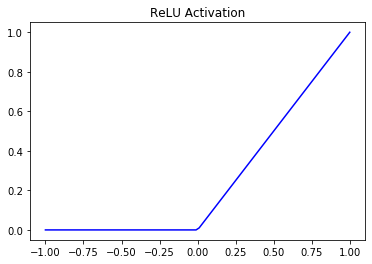

In [7]:
# input vector
x_train = np.linspace(-1,1,100)

# set the network parameters
w1, b1 = 1, 0. 
w2, b2  = 1, 0 

# affine operation (input layer)
l1 = w1*x_train + b1

# RELU activation
h = g(l1)

# output linear layer
y_train = w2*h+b2

plt.plot(x_train, y_train,'-b' )
plt.title('ReLU Activation')
plt.show()

#### Sigmoid activation

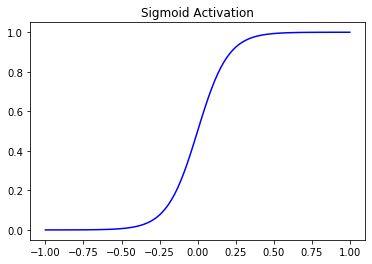

In [8]:
# input vector
x_train = np.linspace(-1,1,100)

# set the network parameters
w1, b1 = 10, 0.
w2, b2  = 1, 0

# affine operation (input layer)
l1 = w1*x_train + b1

# Sigmoid activation
h = sig(l1)

# output linear layer
y_train = w2*h+b2


plt.plot(x_train, y_train,'-b' )
plt.title('Sigmoid Activation')
plt.show()

#### Plot a few cases to become familiar with  the activation

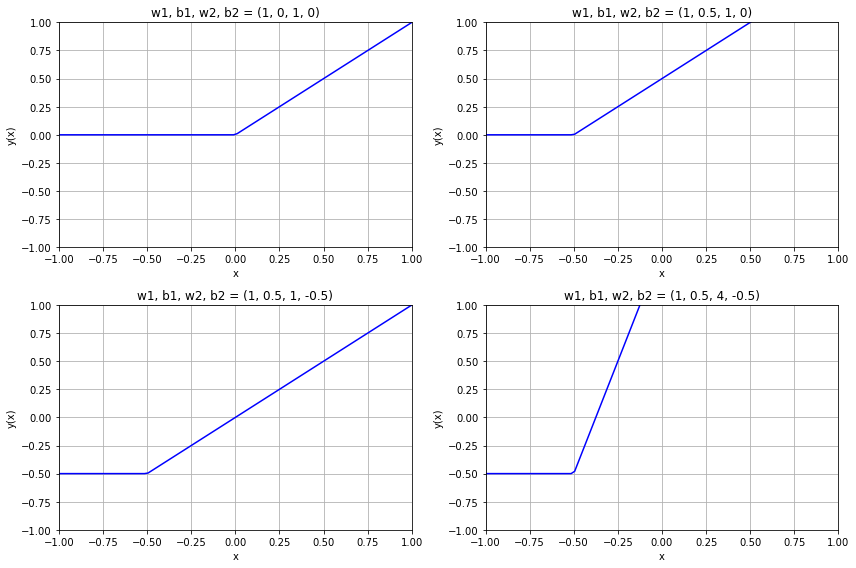

In [9]:
#weights and biases that we want to explore. weight1, bias1, weight2, bias2
weights1 = 1, 0, 1, 0
weights2 = 1, 0.5, 1, 0
weights3 = 1, 0.5, 1, -0.5
weights4 = 1, 0.5, 4, -.5
weights_list = [weights1, weights2, weights3, weights4]

def simple_FFN(w1, b1, w2, b2, activation):
    """
    Takes weights, biases, and an activation function and returns a simple prediction.
    Arguments:
        w1, w2: weights 1 and 2
        b1, b2: biases 1 and 2
    """
    # linear input layer
    l1 = w1 * x_train + b1
    #activation function + output linear layer
    y_pred = w2 * activation(l1) + b2
    return y_pred

#make our plot
plt.figure(figsize=[12,8])

for i, w_list in enumerate(weights_list):
    
    #make our weight dictionary then feed the dictionary as arguments to the FFN to get a prediction.
    w_dict = dict(zip(["w1", "b1", "w2", "b2"], w_list))
#     print(w_dict)
    y_train_pred = simple_FFN(**w_dict, activation = g)
    
    #make the plot
    plt.subplot(2, 2, i+1)
    plt.plot(x_train, y_train_pred, 'b')
    plt.ylim([-1,1])
    plt.xlim([-1,1])
    plt.title('w1, b1, w2, b2 = {}'.format(w_list))
    plt.ylabel("y(x)")
    plt.xlabel("x")
    plt.grid('on')
plt.tight_layout()

#### Explore the sigmoid activation

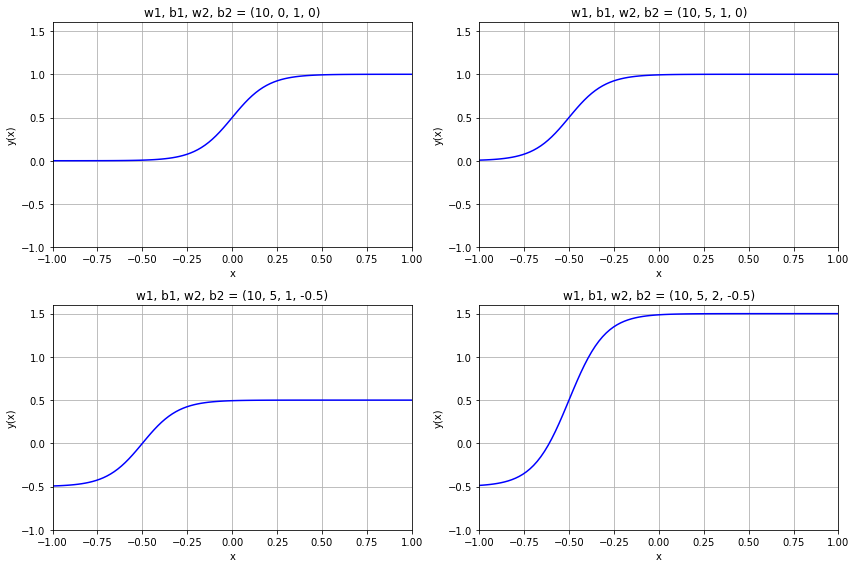

In [10]:
#weights and biases that we want to explore. weight1, bias1, weight2, bias2
weights_1 = 10, 0, 1, 0
weights_2 = 10, 5, 1, 0
weights_3 = 10, 5, 1, -.5
weights_4 = 10, 5, 2, -.5
weights_list = [weights_1, weights_2, weights_3, weights_4]

#make our plot
plt.figure(figsize=[12,8])

for i, w_list in enumerate(weights_list):
    
    #make our weight dictionary then feed the dictionary as arguments to the FFN to get a prediction.
    #note how we have changed the activation function to sigmoid.
    w_dict = dict(zip(["w1", "b1", "w2", "b2"], w_list))
    y_train_pred = simple_FFN(**w_dict, activation = sig)
    
    #make the plot
    plt.subplot(2, 2, i+1)
    plt.plot(x_train, y_train_pred, 'b')
    plt.ylim([-1,1.6])
    plt.xlim([-1,1])
    plt.title('w1, b1, w2, b2 = {}'.format(w_list))
    plt.ylabel("y(x)")
    plt.xlabel("x")
    plt.grid('on')

plt.tight_layout()

# Break Out Room 1

**Design a simple FFNN and fit a simple dataset**

- Load the `toyDataSet_1.csv` from the data directory.
- Write an FFNN with `one hidden` layer of `one neuron` and fit the data. 
- Between `ReLU` and `Sigmoid`, choose which activation function works better 
- Make a plot with the ground truth data and the prediction
- Use the sklearn `mean_squared_error()` to evaluate  the prediction

**Neglect splitting into training and testing sets for this simple task. Just fit and evaluate the prediction on the entire set**


In [11]:
def plot_toyModels(x_data, y_data, y_pred=None):
    # plot the prediction and the ground truth
    if type(y_data) != type(None):
        plt.plot(x_data, y_data,'or',label='data')
    if type(y_pred) != type(None):
        plt.plot(x_data, y_pred,'-b', linewidth=4, label='FFNN' , alpha=.7)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()

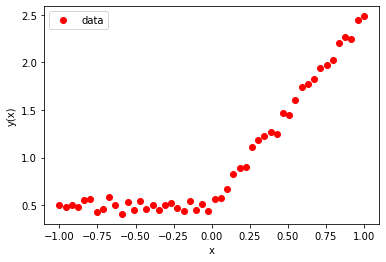

In [12]:
toySet_1 = pd.read_csv('../data/toyDataSet_1.csv')
x_train = toySet_1['x'].values.reshape(-1,1)
y_train = toySet_1['y'].values.reshape(-1,1)

plot_toyModels(x_train, y_train)

In [68]:
## your code here

# set the network parameters
w1 = 
b1 = 

w2 =
b2 =

# affine operation
l1 = TODO

# activation (Choose between ReLu or Sigmoid)
h = TODO
# output linear layer
y_model_train = TODO


# Make a plot (use the ploting function defined earlier)
plot_toyModels(x_train, y_train, y_model_train)

# Use MSE to evaluate the prediction
mse_toy = TODO
print('The MSE for the training set is ', np.round(mse_toy,5))


SyntaxError: invalid syntax (<ipython-input-68-e22e193d3fa9>, line 4)

In [15]:
# %load '../solutions/sol_1.py'

###  A function for a more complex Forward Pass
Let's write a function for the forward propagation through an FFNN with  one input, one linear output neuron, and one hidden layers with arbitrary number of neurons. 

General Scheme:
1. One input vector: $x$ 
$$$$
2. Affine (linear) transformation: $l_1$ where $w_{1},~b_{1}$  are the parameter vectors (or $w_{1i},~b_{1i}$):
$$l_1 = \sum_{i=1}^\text{neurons} w_{1i}x+b_{1i} = w^T_1 x + b_1  = w_1 \cdot x + b_1 = W_1\cdot X$$
$$$$
3. Activation function (nonlinear transformation): $g(\cdot)$ 
$$h = g(l_1)$$ $$$$

4. Linear Output layer with a vector for weights $w_o$ and a scalar bias $b_o$: 
$$y = w_o^T h+b_o = w_o \cdot h + b_o = W_o\cdot H$$

In [16]:
def myFFNN(X, W1, Wo, activation='relu'):
    """
    This function is a simple feed forward nueral network that takes in two weight vectors and a design matrix and 
    returns a prediction (yhat). 
    
    Network specifications:
        input dimensions  = 1
        output dimensions = 1
        hidden layers = 1
        **hidden neurons are determined by the size of W1 or W0**
    
    Parameters:
        Design Matrix:
            X: the design matrix on which to make the predictions.
        weights vectors:
            W1 : parameters of first layer 
            Wo : parameters of output layer
        activation:
            The default activation is the relu. It can be changed to sigmoid
    """
    # Input Layer: 
    # add a constant column for the biases to the input vector X
    ones = np.ones((len(X),1))
    l1 = X
    l1 = np.append(l1, ones, axis=1)

    # hidden layer: Affine and activation
    a1 = np.dot(W1, l1.T)
    
    if activation=='relu':
        h1 = g(a1)    
    elif activation=='sigmoid':
        h1 = sig(a1)    
        
    # Output layer (linear layer) (2 steps)
    # (a) Add a const column the h1 for the affine transformation
    ones = np.ones((len(X),1))    
    
    H= np.append(h1.T, ones,axis=1).T
    # (b) Affine
    a = np.dot(Wo,H)
    y_hat = a.T

    return y_hat

#### Use the previous parameters in our forward propagation function to fit the toyDataSet_1.csv. Plot the results and print the associated loss (the MSE)

MSE Loss =  0.0023


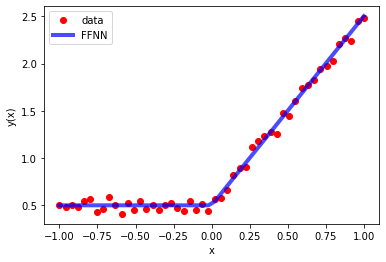

In [17]:
w11 = 2
b11 = 0.0
w21  = 1
b21  = 0.5

# make the parameters matrices
# First layer
W1 = np.array([[w11,b11]])

# Output Layer (only one bias term)
Wo = np.array([[w21,b21]])

# run the model
y_model_1 = myFFNN(x_train, W1, Wo )

# plot the prediction and the ground truth
plot_toyModels(x_train, y_train, y_model_1)

# quantify your prediction
Loss_1 = mean_squared_error(y_train, y_model_1) 
print('MSE Loss = ', np.round(Loss_1,4))

### FFNN is a Universal Approximator
Explore  what functions can be generated by a single-hidden layer network with many neurons.

There is a rigorous proof that a FFNN can approximate any continuous function if the network has sufficient hidden neurons. For more information check the paper *NeuralNets_UniversalApproximators* in the `notes` directory

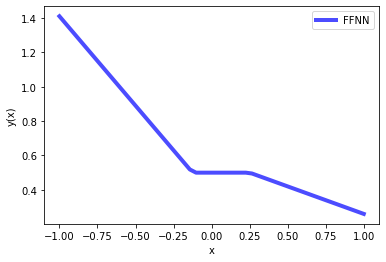

In [18]:
# Two Neurons

w11 = -.8
b11 = -.1

w12 = .4
b12 = -.1

w21  = 1.3
w22  = -.8

b2  = 0.5

# First Layer
W1 = np.array([[w11,b11], [w12,b12]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22, b2]])


# run the model
y_model_p = myFFNN(x_train, W1, Wo, activation='relu' )
plot_toyModels(x_train, y_data=None, y_pred=y_model_p)


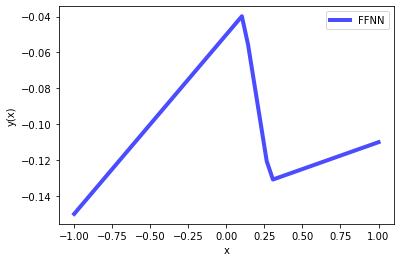

In [19]:
# Three Neurons
w11 = -.1
b11 = .3

w12 = .9
b12 = -.1

w13 = .7
b13 = -.2


w21  = -1.
w22  = -.7
w33  = .8

b2  = 0.25

# First Layer
W1 = np.array([[w11,b11], [w12,b12], [w13,b13]])
# Output Layer (only one bias term)
Wo = np.array([[w21,w22,w33, b2]])

# run the model
y_model_p = myFFNN(x_train, W1, Wo )

# plot the prediction and the ground truth
plot_toyModels(x_train, y_data=None, y_pred=y_model_p)
plt.show()

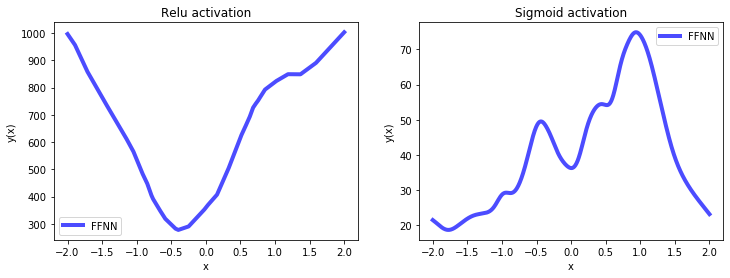

In [20]:
# Random numbers between a,b
# (b-a) * np.random.random_sample((4, 4)) + a
a = -20
b = 20

# N neurons
N = 50

# Create random parameter matrices
W1 = (b-a) * np.random.random_sample((N, 2)) + a
Wo = (b-a) * np.random.random_sample((1, N+1)) + a

# make a bigger interval
x_train_p2 = np.linspace(-2,2,1000)
x_train_p2= x_train_p2.reshape(-1,1)

## run the models and plot the predictions
plt.figure(figsize=[12,4])

# # RELU ACTIVATION
y_model_p2 = myFFNN(x_train_p2, W1, Wo, activation='relu' )

plt.subplot(1,2,1)
plot_toyModels(x_train_p2, y_data=None, y_pred=y_model_p2)
plt.title('Relu activation')

# ## SIGMOID ACTIVATION
y_model_p2 = myFFNN(x_train_p2, W1, Wo, activation='sigmoid' )

plt.subplot(1,2,2)
plot_toyModels(x_train_p2, y_data=None, y_pred=y_model_p2)
plt.title('Sigmoid activation')
plt.show()


-------------

## 3. TensorFlow and Keras

**Keras, Sequential:** [Source]
(https://keras.io/models/sequential/)


There are many powerful packages to work with neural networks like **TensorFlow** and **PyTorch**. These packages provide both the forward and backward propagations, where the latter is used to  train (optimize) a network. Training means  to find the optimal parameters for a specific task.

Here, we use TensorFlow (TF) and Keras to employ FFNN. 
- Use Keras to fit the simple toyDataSet_1 dataset. Tune the weights manually.
    - Learn the `Sequential` method
- Use backpropagation supported by TF to find the optimal parameters for the same dataset.
    - Learn the `fit` method

#### Import packages from keras

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

#### Read again the toyDataSet_1 and define the weights used in solution 1

In [22]:
toySet_1 = pd.read_csv('../data/toyDataSet_1.csv')
x_train = toySet_1['x'].values.reshape(-1,1)
y_train = toySet_1['y'].values.reshape(-1,1)

w1 = 2
b1 = 0.0
w2  = 1
b2  = 0.5


#### Use Keras to build the previous simple architecture and fit the toyDataSet. Set manually the previously used weights

In [47]:
model = models.Sequential(name='Single_neurons_model_fixedWeights')

# hidden layer with 1 neuron (or node)
model.add(layers.Dense(1, activation='relu',
                       kernel_initializer='random_normal', bias_initializer='random_uniform', 
                       input_shape=(1,)))

# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

model.summary()


Model: "Single_neurons_model_fixedWeights"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [48]:
# A FUNCTION THAT READS AND PRINTS OUT THE MODEL WEIGHTS/BIASES
def print_weights(model):
    weights = model.get_weights()
    print(dict(zip(["w1", "b1", "w2", "b2"], [weight.flatten()[0] for weight in weights])))


print('Initial values of the parameters')
print_weights(model)


# MANUALLY SETTING THE WEIGHTS/BIASES
# Read and then define the weights
weights = model.get_weights()
# hidden layer
weights[0][0] = np.array([w1]) #weights 
weights[1]    = np.array([b1]) # biases
# output layer 
weights[2]    =  np.array([[w2]]) # weights
weights[3]    = np.array([b2])    # bias

# Set the weights
model.set_weights(weights)

print('\nAfter setting the parameters')
print_weights(model)

Initial values of the parameters
{'w1': 0.011672685, 'b1': 0.027603041, 'w2': 1.4585346, 'b2': 0.0}

After setting the parameters
{'w1': 2.0, 'b1': 0.0, 'w2': 1.0, 'b2': 0.5}


MSE Loss =  0.0023


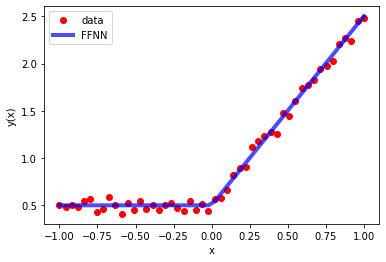

In [49]:
y_model_tf1 = model.predict(x_train)

# plot the prediction and the ground truth
plot_toyModels(x_train, y_train, y_pred=y_model_tf1)

# quantify your prediction
Loss_tf1 = mean_squared_error(y_train, y_model_tf1) 
print('MSE Loss = ', np.round(Loss_tf1,4))

### Train the network: Find the optimal weights

#### Back propagation

The **backward** pass is the training. It is based on the chain rule of calculus, and it updates the parameters. The optimization is done by minimizing the loss function.

<img src="../fig/dl.jpg" width="70%"/>

#### Batching, stochastic gradient descent, and epochs
Shuffle and split the entire dataset in mini-batches to help escape from local minima

<img src="../fig/batching.jpg" width="70%"/>



In [63]:
model_t = models.Sequential(name='Single_neurons_model_training')

# hidden layer with 1 neurons (or nodes)
model_t.add(layers.Dense(1, activation='relu', 
                 kernel_initializer='random_normal', bias_initializer='random_uniform', 
                 input_shape=(1,)))

# output layer, one neuron 
model_t.add(layers.Dense(1,  activation='linear'))

# model_t.summary()

In [64]:
# sgd = optimizers.SGD(lr=0.005)
sgd = optimizers.Adam(lr=0.005)
model_t.compile(loss='MSE',optimizer=sgd) 
history = model_t.fit(x_train, y_train, epochs=2000, batch_size=64, verbose=0)

#### Plot training & validation loss values

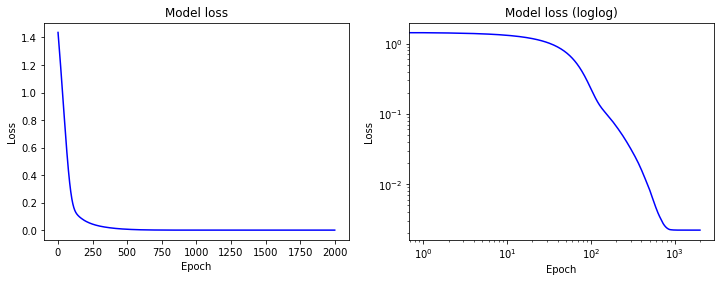

In [65]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.loglog(history.history['loss'],'b')
plt.title('Model loss (loglog)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Visualize the prediction

MSE Loss =  0.0022
MSE with manually tuned weihgts 0.0023


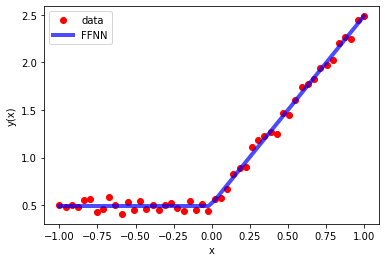

In [66]:
y_model_t = model_t.predict(x_train)

# plot the prediction and the ground truth
plot_toyModels(x_train, y_train, y_pred=y_model_t)

# quantify your prediction
Loss_tf1_t = mean_squared_error(y_train, y_model_t) 
print('MSE Loss = ', np.round(Loss_tf1_t,4))
print('MSE with manually tuned weihgts', np.round(Loss_tf1,4))

#### Check the parameters

In [72]:
weights_t = model_t.get_weights()

print("Trained by TF weights:")
print_weights(model_t)
print("\nManually fixed weights:")#, weights)
print_weights(model)

Trained by TF weights:
{'w1': 1.5288035, 'b1': 0.0145217795, 'w2': 1.2909468, 'b2': 0.4919371}

Manually fixed weights:
{'w1': 2.0, 'b1': 0.0, 'w2': 1.0, 'b2': 0.5}


### Add more neurons and inspect the performance during the training
Explore different activation function, optimizer, number of  hidden neurons and layers

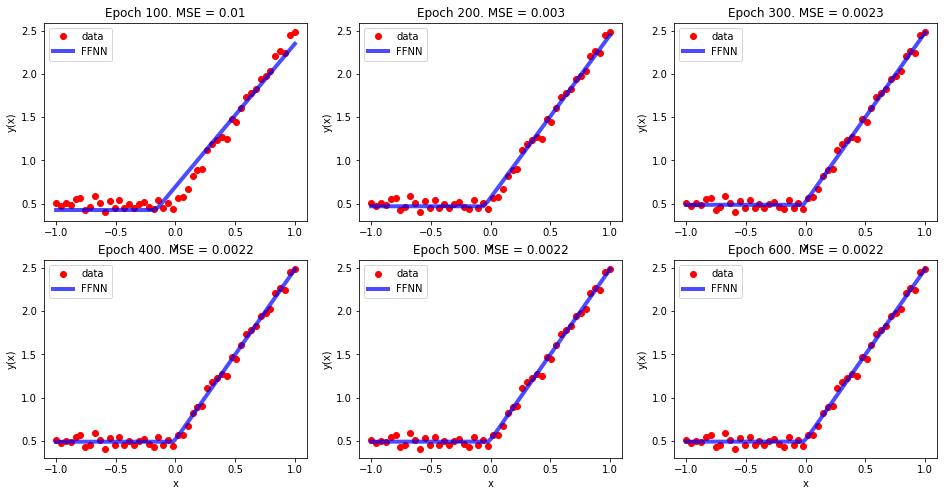

In [78]:
model = models.Sequential(name='Many_neurons_model_relu')
## First hidden layer 
model.add(layers.Dense(5, activation='relu',
                       kernel_initializer='random_normal', bias_initializer='random_uniform', 
                       input_shape=(1,)))
## Extra hidden layer 
# model.add(layers.Dense(20, activation='relu', input_shape=(1,)))
## output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

optimizer = optimizers.SGD(lr=0.005)
# optimizer = optimizers.Adam(lr=0.005)

model.compile(loss='MSE',optimizer=sgd) 

plt.figure(figsize=[16,8])
epochs=100
for i in range(6):
    # Train and Fit and MSE 
    model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=0)
    y_model_t = model.predict(x_train)
    loss = mean_squared_error(y_train, y_model_t)

    # Plot
    plt.subplot(2,3,i+1)
    plot_toyModels(x_train, y_train, y_model_t)
    plt.title('Epoch '+str(epochs*(i+1)) + '. MSE = ' + str(np.round(loss,4)))

In [79]:
model.summary()

Model: "Many_neurons_model_relu"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


#### Helper functions: 
1. For plotting train set, test set, neural network predictions
2. For plotting the training and validation loss functions

In [80]:
def array_exists(arr):
        return hasattr(arr, 'shape')
#check if the numpy array exists
def reshape_if_exists(arr):
    if array_exists(arr):
        return arr['x'].values.reshape(-1,1), arr['y'].values.reshape(-1,1)
    else:
        return None, None
    
def reshape_and_extract_sets(train_set, test_set):
    """
    Extracts x_train, y_train, x_test and y_test and reshapes them for using with keras.
    """    
    x_train, y_train = reshape_if_exists(train_set)
    x_test, y_test   = reshape_if_exists(test_set)
    return x_train, y_train, x_test, y_test

def plot_sets(train_set = None, test_set = None, NN_model = None):
    """
    plots the train set, test set, and Neural network model.
    This function is robust to lack of inputs. You can feed it any combination of train_set, test_set and 
    """
    x_train, y_train, x_test, y_test = reshape_and_extract_sets(train_set, test_set)
    
    if array_exists(train_set):
        plt.plot(x_train, y_train,'or',label='train data')
        
    if array_exists(test_set):
        plt.plot(x_test, y_test,'^g',label='test data')

    # if the neural network model was provided, plot the predictions.
    if type(NN_model) != type(None):
        NN_preds = NN_model.predict(x_train) 
        sorted_idx = np.argsort(x_train.reshape(-1,))
        plt.plot(x_train[sorted_idx], NN_preds[sorted_idx],'-b',linewidth=4,label='FFNN', alpha = 0.7)

    plt.xlabel("x")
    plt.ylabel("y(x)")
    plt.legend()
    plt.show()
    
def plot_loss(model_history):
    plt.loglog(model_history.history['loss'],linewidth=4, label = 'Training')
    plt.loglog(model_history.history['val_loss'],linewidth=4, label = 'Validation', alpha=0.7)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Split the data and train a network with the training set and evaluate the model on the test set

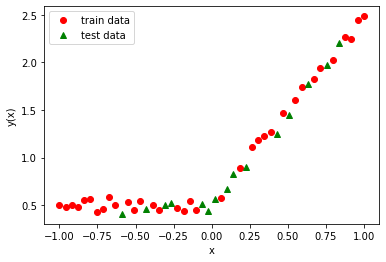

In [81]:
# The usual split
toy_train, toy_test = train_test_split(toySet_1, train_size=0.7, random_state=109)

# use helper functions to extract and plot the datasets
x_train, y_train, x_test, y_test = reshape_and_extract_sets(toy_train, toy_test)
plot_sets(toy_train, test_set = toy_test)

In [85]:
model_2 = models.Sequential(name='Many_neurons_model_relu_2')
# hidden layer with 2 neurons (or nodes)
model_2.add(layers.Dense(10, activation='relu',
                         kernel_initializer='random_normal', bias_initializer='random_uniform', 
                         input_shape=(1,)))

## Add an extra layer
# model_2.add(layers.Dense(10, activation='relu', input_shape=(1,)))

# output layer, one neuron 
model_2.add(layers.Dense(1,  activation='linear'))

# optimizer = optimizers.SGD(lr=0.01)
optimizer = optimizers.Adam(0.01)

model_2.compile(loss='MSE',optimizer=optimizer) 



In [86]:
history_2 = model_2.fit(x_train, y_train, epochs=1500, batch_size=64, verbose=0,
            validation_data= (x_test, y_test))

Plot the training and validation loss functions

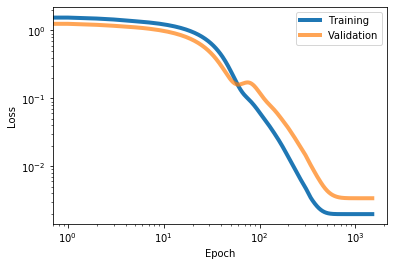

In [87]:
plot_loss(history_2)

Plot the predictions along with the ground truth data

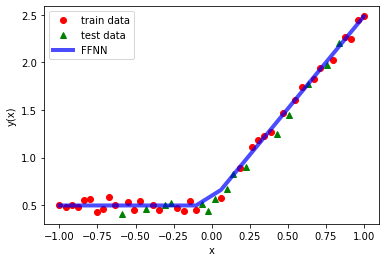

In [88]:
plot_sets(train_set = toy_train, test_set = toy_test, NN_model = model_2)

# Break Out Room 2

**Let's fit something very nonlinear**

- Load the toyDataSet_2.csv from the data directory.
- Split the data in training and testing sets.
- Use Keras to desing an FFNN with `Sequential()`:
    - two hidden layers of 20 neurons
    - with tanh() activation function `tanh`
- Use Adam optimizer with learning rate 0.005 `Adam(0.005)`
- Define MSE as the loss function and `compile()` 
- Train the model with the training set and validate with the testing set: `fit()`

- Plot the training and validation loss functions `plot_loss()`
- Plot the prediction along with the ground truth data



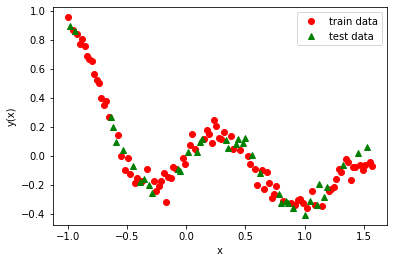

In [89]:
toySet_2 = pd.read_csv('../data/toyDataSet_2.csv')

toy_train2, toy_test2 = train_test_split(toySet_2, train_size=0.7, random_state=109)
x_train2, y_train2, x_test2, y_test2 = reshape_and_extract_sets(toy_train2, toy_test2)

plot_sets(toy_train2, toy_test2)

In [192]:
#############################
# Design the neural network
#############################
model = 
# hidden layer with 20 neurons (or nodes)
model.add( ?? )
# Add another hidden layer of 20 neurons
model.add( ?? )
# output layer, one neuron 
model.add( ?? )

##############################################
## SET OPTIMIZER AND LOSS. COMPILE AND FIT
##############################################
optimizer=
model.compile( ?? ) 
history_toy2 = model.fit( ?? )

# PLOT THE LOSS FUNCTIONS
plot_loss( ?? )

# PLOT DATA AND PREDICTIONS
plot_sets( ?? )


SyntaxError: invalid syntax (<ipython-input-192-bfb554135ba7>, line 4)

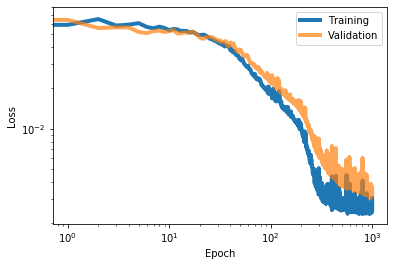

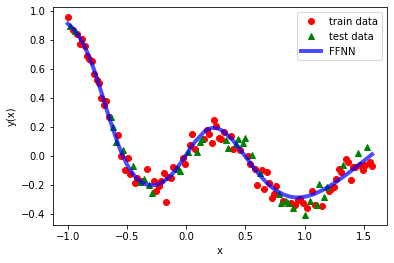

In [94]:
# %load '../solutions/sol_2.py'

# Classification Task using NeuralNets

In [95]:
# we'll use keras a lot more in the last few weeks of the course
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


This picture belongs to the class for number 3


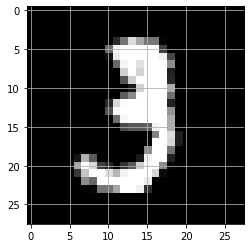

In [97]:
print('This picture belongs to the class for number', y_train[10])
fig, ax = plt.subplots()
ax.grid('off')
ax.imshow(x_train[10], cmap='gray');

In [98]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# check if the shapes are ok
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# checking the min and max of x_train and x_test
print(x_train.min(), x_train.max(), x_test.min(), x_test.max())

# NORMALIZE
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min()) 
x_test = (x_test - x_train.min())/(x_train.max() - x_train.min()) 

print(x_train.min(), x_train.max(), x_test.min(), x_test.max())

(60000, 784) (60000,) (10000, 784) (10000,)
0 255 0 255
0.0 1.0 0.0 255.0


In [153]:
model_mnist = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape = (784,)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# One could also do:
# model_mnist = tf.keras.models.Sequential()
# model_mnist = tf.keras.layers.Input(shape = (784,)),
# model_mnist.add(layers.Dense(784, activation='relu'))
# model_mnist.add(layers.Dense(10, activation='softmax'))

model_mnist.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)


In [154]:
trained_mnist = model_mnist.fit(
    x = x_train, y = y_train, 
    epochs=6, batch_size=128, 
    validation_data= (x_test, y_test),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3574 - accuracy: 0.9021 - val_loss: 23.9483 - val_accuracy: 0.9441
Epoch 2/6
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1614 - accuracy: 0.9544 - val_loss: 18.0437 - val_accuracy: 0.9594
Epoch 3/6
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1162 - accuracy: 0.9667 - val_loss: 15.2839 - val_accuracy: 0.9669
Epoch 4/6
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0892 - accuracy: 0.9744 - val_loss: 14.4179 - val_accuracy: 0.9705
Epoch 5/6
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0718 - accuracy: 0.9792 - val_loss: 12.7250 - val_accuracy: 0.9751
Epoch 6/6
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0587 - accuracy: 0.9832 - val_loss: 13.1930 - val_accuracy: 0.9725


#### Helper function for plotting model accuracy and loss for training and validation

In [155]:
def plot_accuracy_loss(model_history):
    plt.figure(figsize=[12,4])
    plt.subplot(1,2,1)
    plt.semilogx(model_history.history['accuracy'], label = 'train_acc', linewidth=4)
    plt.semilogx(model_history.history['val_accuracy'], label = 'val_acc', linewidth=4, alpha=.7)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.loglog(model_history.history['loss'], label = 'train_loss', linewidth=4)
    plt.loglog(model_history.history['val_loss'], label = 'val_loss', linewidth=4, alpha=.7)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


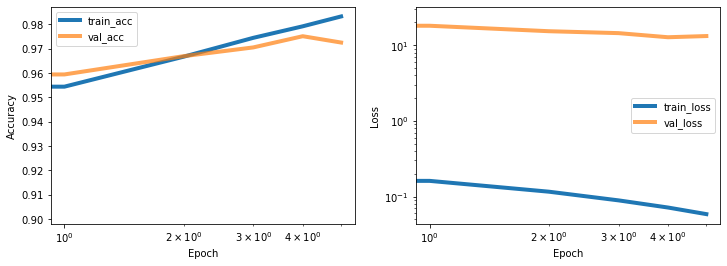

In [156]:
plot_accuracy_loss(trained_mnist)

#### Two helper functions. Let inspect the performance visually

In [157]:
# Make a single prediction and validate it
def example_NN_prediction(dataset = x_test, 
                          model_ = model_mnist):
    """
    This tests our MNist FFNN by examining a single prediction on the test set and 
    checking if it matches the real label.
    
    Arguments:
        n: if you select n then you will choose the nth test set
    """
    mnist_preds = model_mnist.predict(x_test)
    all_predictions = np.argmax(mnist_preds, axis = 1)
    
    n = np.random.choice(784)
    digit = x_test[n,:]
    actual_label = y_test[n]
    
    plt.imshow(digit.reshape(-1, 28))
    prediction_array = model_.predict(digit.reshape(1,-1))
    prediction = np.argmax(prediction_array)
    if prediction == y_test[n]:
        print("The Mnist model correctly predicted:", prediction)
    else:
        print("The true label was", actual_label)
        print("The Mnist model incorrectly predicted:", prediction)

####################################################        
# Make a many predictions and validate them
###################################################
def example_NN_predictions(model_,
                          dataset_ = x_test,
                          response_ = y_test,
                          get_incorrect = False):
    """
    This tests our MNist FFNN by examining 3 images and checking if our nueral network
    can correctly classify them.
    
    Arguments:
        model_ : the mnist model you want to check predictions for.
        get_incorrect (boolean): if True, the model will find 3 examples 
                        where the model made a mistake. Otherwise it just select randomly.
    """
    dataset  = dataset_.copy()
    response = response_.copy()
    
    # If get_incorrect is True, then get an example of incorrect predictions.
    # Otherwise get random predictions.
    if not get_incorrect:
        n = np.random.choice(dataset.shape[0], size = 3)
        digits = dataset[n,:]
        actual_label = response[n]
    else:
        # Determine where the model is making mistakes:
        mnist_preds = model_mnist.predict(dataset)
        all_predictions = np.argmax(mnist_preds, axis = 1)
        incorrect_index = all_predictions != response
        incorrect = x_test[incorrect_index, :]
        
        # Randomly select a mistake to show:
        n = np.random.choice(incorrect.shape[0], size = 3)
        digits  = incorrect[n,:]
        
        # determine the correct label
        labels = response[incorrect_index]
        actual_label = labels[n]
      
    #get the predictions and make the plot:
    fig, ax = plt.subplots(1,3, figsize = (12, 4))
    ax = ax.flatten()
    
    for i in range(3):
        #show the digit:
        digit = digits[i,:]
        ax[i].imshow(digit.reshape(28,-1)) #reshape the image to 28 by 28 for viewing
        
        # reshape the input correctly and get the prediction:
        prediction_array = model_.predict(digit.reshape(1,-1))
        prediction = np.argmax(prediction_array)
        
        #Properly label the prediction (correct vs incorrect):
        if prediction == actual_label[i]:
            ax[i].set_title("Correct Prediction: " + str(prediction))
        else:
            ax[i].set_title('Incorrect Prediction: {} (True label: {})'.format(
                prediction, actual_label[i]))
    plt.tight_layout()


The Mnist model correctly predicted: 0


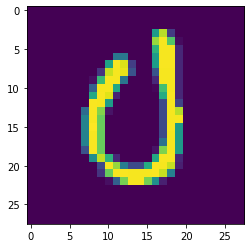

In [158]:
example_NN_prediction()


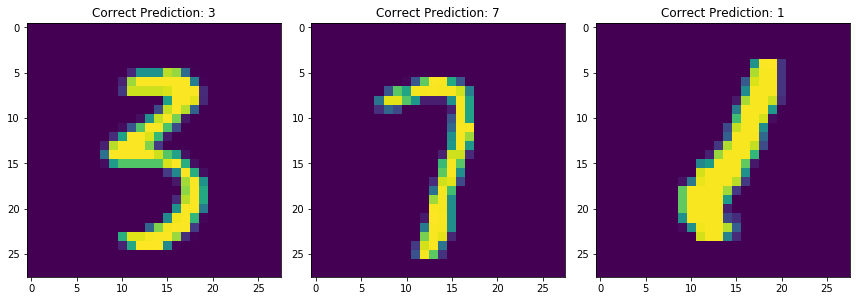

In [159]:
example_NN_predictions(model_ = model_mnist, get_incorrect = False)

Let's see where the network makes the wrong predictions

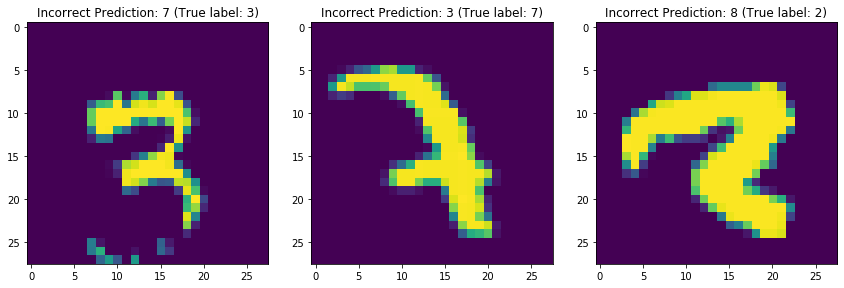

In [160]:
example_NN_predictions(model_ = model_mnist, get_incorrect = True)

# Break Out Room 3

**Try this on your own, with the Iris dataset that we saw in Section 5**

- Load and split the Iris dataset.
- Use Keras to build and train a network for fitting the data.
- Use `two hidden` layers of `32 neurons` each with `relu` activation functions.
- Figure out `how many output neurons` you need. 
- Use the training data set for training and testing set for evaluation. 
- Train for `100` epochs and try `Adam` optimizer with learning rate `0.005`
- Use the `sparse_categorical_crossentropy` loss function.
- Plot the accuracy and loss by using the `plot_accuracy_loss()`



In [166]:
from sklearn import datasets

In [162]:
iris_data = datasets.load_iris()

In [163]:
X = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(data=iris_data.target, columns=['species'])

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=41)

In [168]:
# %load '../solutions/sol_3.py'

#### Rolling Average: A useful representation for the accuracy and loss

In [173]:
def get_rolling_avg(arr, rolling = 10):
    return pd.Series(arr).rolling(rolling).mean()

def plot_accuracy_loss_rolling(model_history):
    rollNum = 10
    plt.figure(figsize=[12,4])
    plt.subplot(1,2,1)
    plt.semilogx(get_rolling_avg(model_history.history['accuracy'],rollNum), label = 'train_acc', linewidth=4)
    plt.semilogx(get_rolling_avg(model_history.history['val_accuracy'],rollNum), label = 'val_acc', linewidth=4, alpha=.7)
    plt.xlabel('Epoch')
    plt.ylabel('Rolling Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.loglog(get_rolling_avg(model_history.history['loss'],rollNum), label = 'train_loss', linewidth=4)
    plt.loglog(get_rolling_avg(model_history.history['val_loss'],rollNum), label = 'val_loss', linewidth=4, alpha=.7)
    plt.xlabel('Epoch')
    plt.ylabel('Rolling Loss')
    plt.legend()
    plt.show()


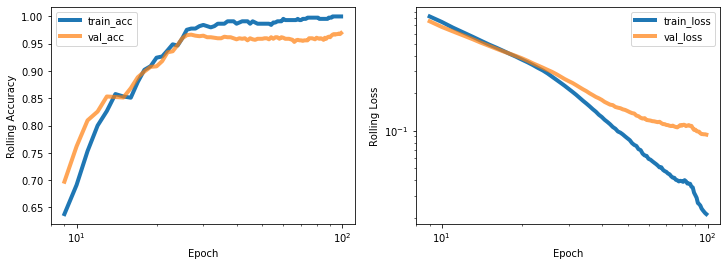

In [174]:
plot_accuracy_loss_rolling(iris_trained)

### Neural Networks are great, so far ... But, what about the overfitting problem ??

In [176]:
# Increase the size of the testing set to encourage overfitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=41)


model_iris = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape = (4,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation = 'softmax')
])
model_iris.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.005),
    metrics=['accuracy'],
)

##################
# TRAIN THE MODEL
##################
iris_trained_ofit = model_iris.fit(
    x = X_train.to_numpy(), y = y_train.to_numpy(), verbose=0,
    epochs=500, validation_data= (X_test.to_numpy(), y_test.to_numpy()),
)

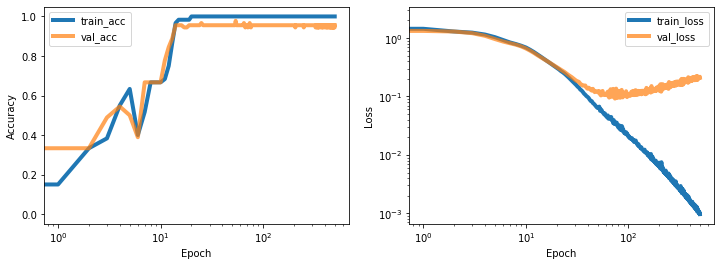

In [177]:
plot_accuracy_loss(iris_trained_ofit)

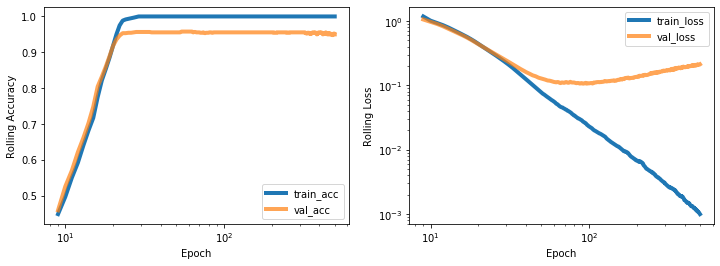

In [178]:
plot_accuracy_loss_rolling(iris_trained_ofit)

##  Regularization is needed! Wait until the next section


----------




## End of Section

----------